# Monte Carlo Metropolis-Hastings (Markov-Chain Monte-Carlo)

### Cosa vogliamo fare?
Vogliamo generare campioni distribuiti secondo una data distribuzione di probabilità p(x)

## Catena di Markov
Costruiamo una sequenza di stati:

$$x^{(0)}, x^{(1)}, x^{(2)}, \dots$$

con questa proprietà: **lo stato successivo dipende solo da quello attuale**, cioè:

$$
P(x^{(n+1)} \mid x^{(n)}, x^{(n-1)}, \dots)
=
P(x^{(n+1)} \mid x^{(n)})
$$

Ad esempio un passo finito composto da due parti:

1. Proposta di un nuovo stato $x'$;

2. Decisione se accettare o rifiutare lo stato proposto.

La proposta deve essere semplice (ad esempio un piccolo spostamento casuale), ad esempio

$$
x' = x + \Delta_{rand}
$$

La probabilità di $x'$ dipende solo dallo stato precedente $x$.

## Algoritmo di Metropolis
Partiamo da uno stato iniziale $x$ e spostiamoci in $x'$. Calcoliamo la probabilità per entrambi gli stati e prendiamone il rapporto delle probabilità

$$
\lambda = \frac{p(x')}{p(x)}
$$

Possiamo avere 2 casi:

1. $\lambda>1$, in questo caso la nuova probabilità è molto vantaggiosa rispetto alla prima;
2. $\lambda<1$, in questo caso la nuova probabilità NON è vantaggiosa e dobbiamo decidere se accettare o meno la nuova proposta.

Qua arriva il cuore del montecarlo: nel caso in cui $\lambda<1$ estraiamo un numero casuale $r$ compreso tra 0 ed 1 e lo utilizziamo per decidere:

* Se $\lambda<r$ rifiutiamo la proposta;
* Se $\lambda>r$ accettiamo la proposta.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
np.random.seed(0)

In [ ]:
def MC_Metropolis(N, skip, step, T, m, kB):

    vx, vy = 0.0, 0.0  # stato iniziale
    beta = m / (2.0 * kB * T)  # fattore dell'esponenziale

    vx_list = []
    vy_list = []

    accepted = 0

    for i in range(N + skip):

        vx_p = vx + step * (2.0 * np.random.rand() - 1.0)
        vy_p = vy + step * (2.0 * np.random.rand() - 1.0)

        v2_old = vx * vx + vy * vy
        v2_new = vx_p * vx_p + vy_p * vy_p

        lamb = np.exp(-beta * (v2_new - v2_old))

        if lamb >= 1.0 or np.random.rand() < lamb:
            vx, vy = vx_p, vy_p
            accepted += 1

        #NOTE: salviamo solo dopo il periodo di skip
        if i >= skip:
            vx_list.append(vx)
            vy_list.append(vy)

    vx = np.array(vx_list)
    vy = np.array(vy_list)
    acc_rate = accepted / (N + skip)

    return vx, vy, acc_rate

In [4]:
def MB_theo(v, T=1.0, m=1.0, kB=1.0):
    a = m / (kB * T)
    return a * v * np.exp(-0.5 * a * v * v)

In [ ]:
T, m, kB = 2.0, 1.0, 1.0
vx, vy, acc = MC_Metropolis(N=200000, skip=20000, step=1.0, T=T, m=m, kB=kB)

In [6]:
print("Acceptance rate:", acc)

# CONTROLLI TEORICI SEMPLICI
print("<vx^2> MC:", np.mean(vx * vx), " theory:", kB * T / m)
print("<vy^2> MC:", np.mean(vy * vy), " theory:", kB * T / m)
print("<v^2>  MC:", np.mean(vx * vx + vy * vy), " theory:", 2 * kB * T / m)

Acceptance rate: 0.7888727272727273
<vx^2> MC: 2.0099458218696062  theory: 2.0
<vy^2> MC: 1.9660704347865132  theory: 2.0
<v^2>  MC: 3.9760162566561186  theory: 4.0


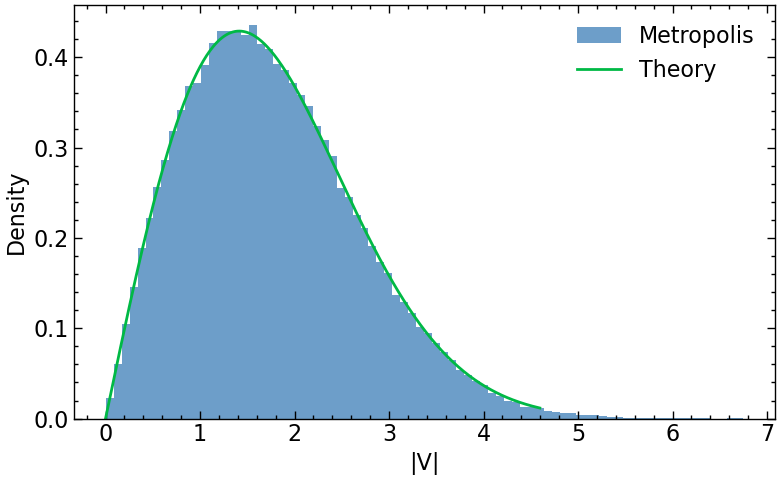

In [7]:
v = np.sqrt(vx * vx + vy * vy)
grid = np.linspace(0, np.quantile(v, 0.995), 400)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(v, bins=80, density=True, alpha=0.6, label="Metropolis")
ax.plot(grid, MB_theo(grid, T=T, m=m, kB=kB), linewidth=2, label="Theory")
ax.set_xlabel("|V|")
ax.set_ylabel("Density")
ax.legend()
fig.tight_layout()
plt.show()